In [1]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import os 
import string
from decimal import *
import yt
import glob
from yt.analysis_modules.particle_trajectories.api import ParticleTrajectories
from mpl_toolkits.mplot3d import Axes3D

/home/nishu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Particle trajectories are now available from DatasetSeries objects as ts.particle_trajectories. The ParticleTrajectories analysis module is deprecated.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
f = h5py.File("relax_hdf5_part_0010","r")

npart  = len(f['tracer particles'][:])
nfield = len(f['particle names'][:])

In [3]:
t= []

for i in range(npart):
    t.append(f['tracer particles'][i][3])
maxT_part_indx = t.index(max(t))
print(maxT_part_indx)
f['tracer particles'][maxT_part_indx][:]

472


array([ 1.00000000e+00,  2.61024260e+02,  7.70650846e+14,  1.66376674e+00,
        3.59657001e+09, -9.27667385e+08,  0.00000000e+00,  1.33833627e+17,
        2.40000000e+01,  1.62000000e+02,  1.00149101e+07,  5.96753846e+06,
        1.24516285e+07, -1.47069256e+08])

In [5]:
time=[]
dens=[]
temp=[]
pres=[]
eint=[]
velx=[]
vely=[]
velz=[]

pf=[]
for n in range(0, 35):
    f = h5py.File("relax_hdf5_part_%04d" % n,"r")
    pf.append(f['tracer particles'][maxT_part_indx][:])
    dens.append(f['tracer particles'][maxT_part_indx][1])  #dens=1
    pres.append(f['tracer particles'][maxT_part_indx][7]) #pres=7
    temp.append(f['tracer particles'][maxT_part_indx][10]) #temp=10
    eint.append(f['tracer particles'][maxT_part_indx][2])  #eint=2
    velx.append(f['tracer particles'][maxT_part_indx][11])
    vely.append(f['tracer particles'][maxT_part_indx][12])
    velz.append(f['tracer particles'][maxT_part_indx][13])
    time.append(f['real scalars'][0][1])
len(time)

35

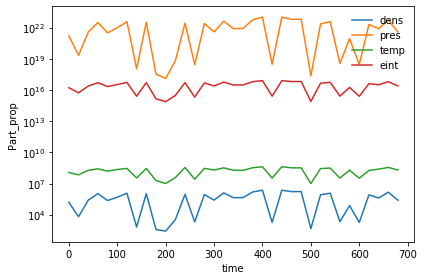

In [6]:
[den, pre, tem, ein]=plt.semilogy(time,dens,time,pres,time,temp,time,eint)
plt.xlabel('time')
plt.ylabel('Part_prop')
plt.legend([den, pre, tem, ein],["dens","pres","temp","eint"],loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig('Particle_property.png',dpi=200)